array([68.33333333, 60.5       , 53.        , 59.33333333, 70.66666667,
       68.33333333, 80.85714286, 64.        , 77.66666667, 60.9       ,
       70.66666667, 59.        , 80.6       , 64.        , 67.        ,
       51.125     , 56.33333333, 70.5       , 65.5       , 75.5       ,
       68.        , 61.5       , 63.66666667, 61.5       , 47.        ,
       60.5       , 67.66666667, 64.5       , 51.125     , 80.125     ,
       52.6       , 91.        , 57.66666667, 68.7       , 73.33333333,
       64.        , 72.25      , 68.33333333, 76.        , 66.83333333,
       61.875     , 54.83333333, 58.5       , 92.        , 67.22222222,
       76.        , 69.5       , 62.14285714, 72.        , 63.5       ,
       64.        , 52.        , 45.        , 66.66666667, 73.33333333,
       68.33333333, 61.5       , 72.33333333, 73.4       , 61.5       ,
       47.        , 66.        , 83.        , 64.        , 66.66666667,
       51.        , 60.9       , 69.5       , 71.5       , 83.5 

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

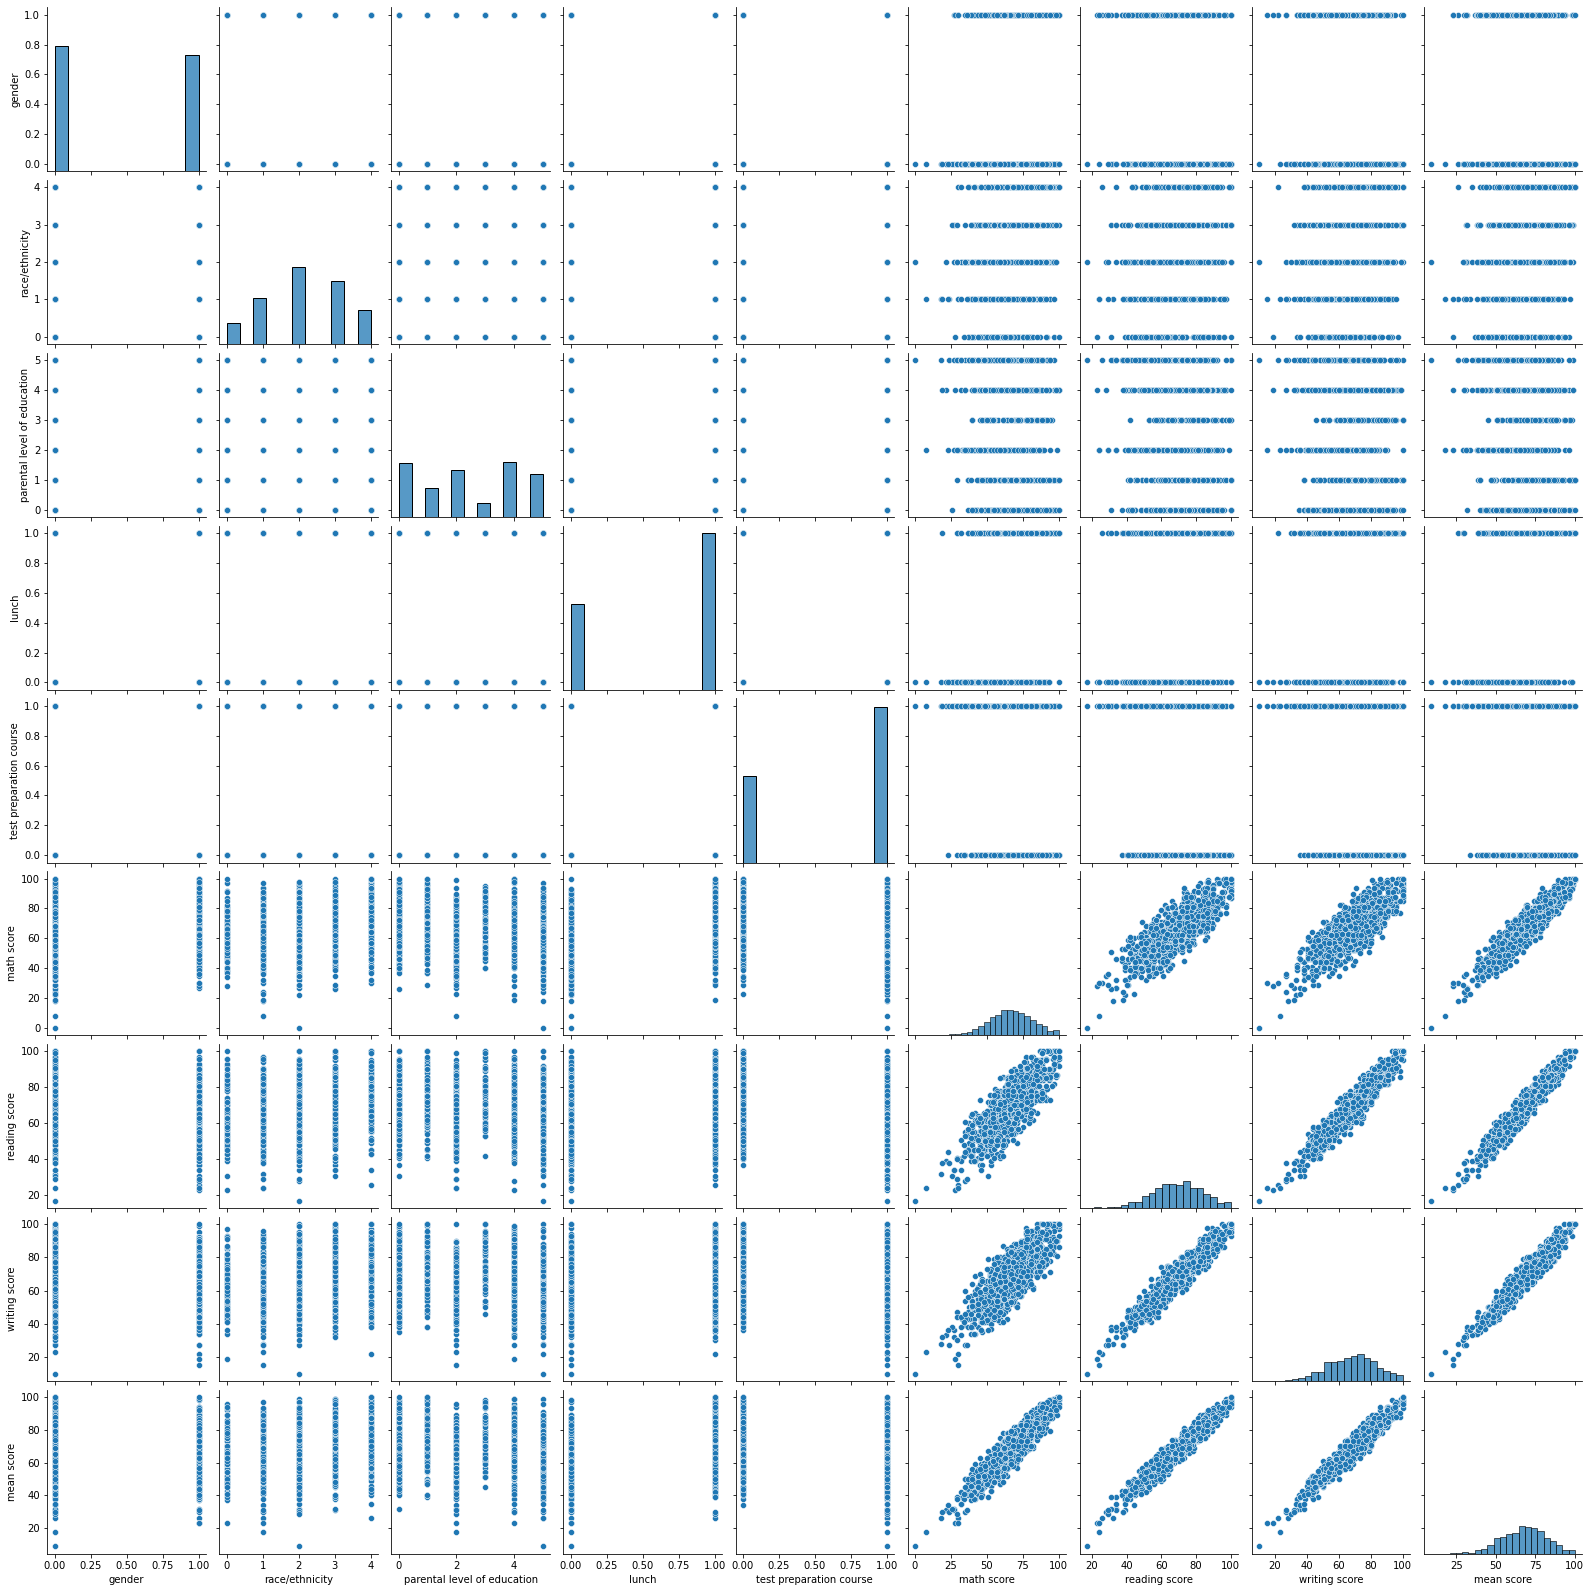

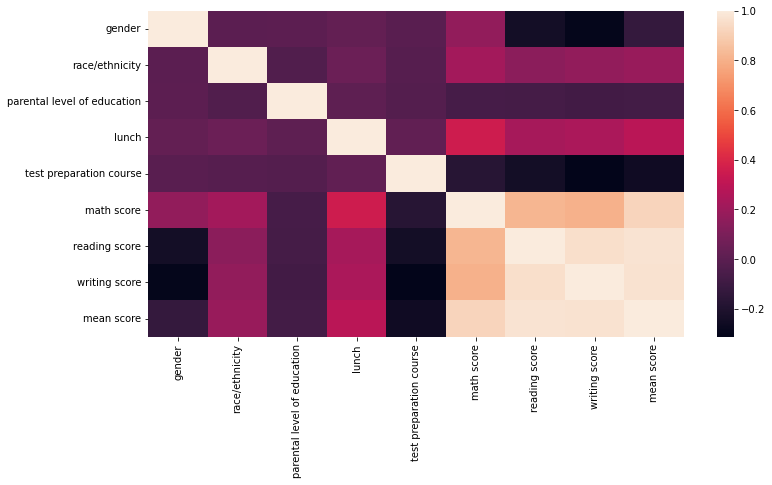

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

#Reading data 
data = pd.read_csv('StudentsPerformance.csv')
#data.head(20)
data["mean score"] = ((data["math score"] + data["reading score"] + data["writing score"]) /3).round()

#explor how many female and meale in the class 
data['gender'].value_counts()

#Label Encoding my data so that i can read my data in numeric form 

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['gender']= lc.fit_transform(data['gender'])
data['race/ethnicity']= lc.fit_transform(data['race/ethnicity'])
data['parental level of education']= lc.fit_transform(data['parental level of education'])
data['lunch']= lc.fit_transform(data['lunch'])
data['test preparation course']= lc.fit_transform(data['test preparation course'])
data.head(20)


#Analsing gender and race/ethnicity
#sns.countplot(data['gender'], hue= data['race/ethnicity'])
#green hue is most so green denote 2 in race/ethnicity and 2 is belongs to  Group c 
#that means most number of femal come form group c race/ethnicity
#blue hue is the leas so blue denote 0 race/ethnicity and 0 is belongs to Group A
#that means least number of female come form gorup A race/ethnicity 

# 0 -> feamle and 1 -> male  in gender colum 
#ethincity cloumn 
# 0 -> blue->group A   
# 2->green->group C 



#Anlyzing Test preparation Course 
data['test preparation course'].value_counts()
#there are two types of data has in test prepartation course whetver the student done the test preparation the cousre 
# or not done the test preparation course 
#1 denote None that means not completed 
#0 denote done that means completed

#the larger are of the circle is given to notCompleted and 
#smaller area of the circle is given to completed 

labels = ['NotCompleted', 'Completed']
colors = ['red','blue']
#plt.pie(data['test preparation course'].value_counts(), labels = labels, colors = colors)


plt.figure(figsize = (12,6))
#sns.barplot(x = 'test preparation course', y ='mean score', data = data )
#plt.show()
#here i plot a bar chart denoting y as my mean score and x has test preparation course 
#its clear ly tels that the students who have completed  the test preparation course that means 0 
#they are getting more mean score 
# the student who have not done the test preparation course that menas 1 
# the are getting least mean score 
# so the student should focuse on the test prepariton course

#Analysing lunch 
#sns.barplot(x = data['lunch'], y = data['mean score'], palette= 'inferno')
# some students who ar depending on school(schol provide ther lunch for payment or free) for their  lunch  0 -> free luch 
# some students who are depending on home(carry tiffine box ) for getting the lunch 1-> tiffin

# as the result 
#1 wins  they are scoring good in mens socre 



#Analysing parenteal level of education 
#sns.barplot(x = 'parental level of education', y = 'mean score',data = data)
# this is more crusial 
# red hue is max at it 3  masters degree
# That means the students who parent are having master degree they are scoreing good in mean
# green hue is min at it 2 high school 
#That means the students who parent are having high school  degree they are not  scoreing good in mean
# that can be for they are not focusing much to ther child 



plt.figure(figsize =(12,6))
sns.pairplot(data)
#plt.show()
#ploting of finding relation between each and every colums with each and every column 


plt.figure(figsize= (12,6))
sns.heatmap(data.corr())
#plt.show()
#corelation each and every column with each and every column 
#reading and writring and math score having a good relation ship with mean score 
# because these are added and divided by 3 so they should have good relattion ship 
# gender have not a good co realtion 
#race and ethincity have a good co realtion 
#parental level is ok 
#lunch is having good relation ship 
# test preparation couse is not that much but ok 



#data preprocessing 
data = data.drop(['math score','reading score','writing score'],axis = 1)
#data.head(20)
# i drope the math score reading score and writting score that not my 
# concern i am having the mean score/avarage that our target class

from sklearn.model_selection import train_test_split
y = data['mean score']
x = data.drop(['mean score'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 0)
# 20 parcent data is going to testing and 80 parcent data is going to traing 
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion= 'mse')
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)


predictions= regressor.predict(x_test)
predictions
from sklearn.metrics import r2_score

print(r2_score(predictions,y_test))

In [2]:
from sklearn.metrics import r2_score

print(r2_score(predictions,y_test))
# r square value for decision tree algorithm 

-1.3556524365762024
